In [18]:
# read the mmseqs result into jupyter and reformat them
taxa = [int(line.split()[1]) for line in open('taxonomy_result.tsv')]

In [19]:
# count the taxa
from collections import Counter
c = Counter(taxa)

In [20]:
# show the 10 most common taxa
# look them up on the web https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi
# are these useful?
c.most_common(10)

[(131567, 3794),
 (2, 2593),
 (83333, 1860),
 (3702, 1785),
 (2759, 1575),
 (208964, 1189),
 (224308, 1078),
 (44689, 935),
 (266834, 883),
 (1224, 648)]

In [21]:
# stuff for the visualization
from ete3 import NCBITaxa, Tree, TextFace, add_face_to_node, TreeStyle, CircleFace, NodeStyle
ncbi = NCBITaxa()

In [22]:
# get a tree from your list of LCAs
target_rank = "species"
tree = ncbi.get_topology(taxa, rank_limit=target_rank, intermediate_nodes=False, collapse_subspecies=True)

In [23]:
# we only want to look at the bacteria in the set
bacteria = tree.search_nodes(taxid=2)[0]

In [24]:
# we want the most common taxon among the bacteria
taxaLookup = dict(c)
maxCount = 0
counts = taxaLookup.values()
for node in bacteria.iter_descendants("postorder"):
    if node.taxid in taxaLookup:
        if (taxaLookup[node.taxid] > maxCount):
            maxCount = taxaLookup[node.taxid]

In [25]:
# make the tree pretty
ts = TreeStyle()
ts.show_leaf_name = False
def my_layout(node):
    if node.is_leaf():
        F = TextFace(node.sci_name)
        add_face_to_node(F, node, column=0, position="branch-right")
    if node.taxid in taxaLookup and node.taxid != 2:
        C = CircleFace(radius=20*(taxaLookup[node.taxid] / float(maxCount)), color="RoyalBlue", style="sphere")
        add_face_to_node(C, node, 0, position="float")
ts.layout_fn = my_layout
ts.show_branch_length = False
ts.show_branch_support = False
# You can also show a circular tree, if you comment that back inside
# ts.mode = 'c'

In [26]:
# ete3 puts a dot at every branchpoint, remove those
nstyle = NodeStyle()
nstyle["size"] = 0
for node in bacteria.iter_descendants("postorder"):
    node.set_style(nstyle)

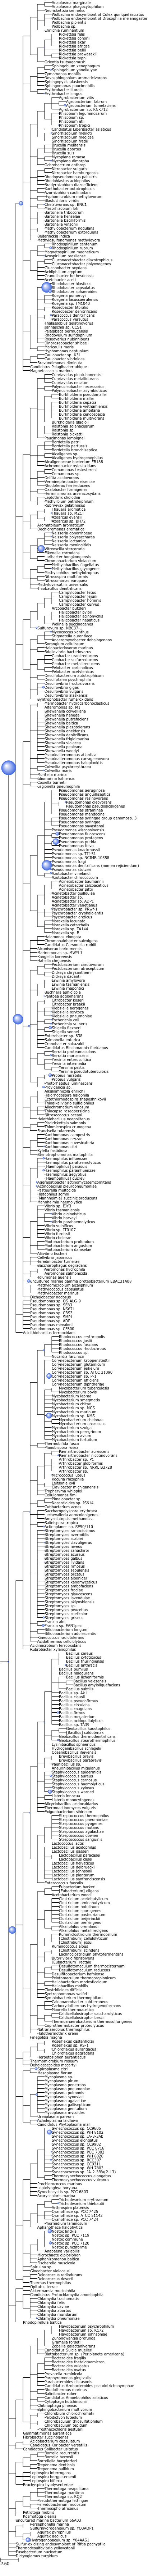

In [27]:
# finally show the tree
bacteria.render("%%inline", tree_style=ts)